**Objective**. This notebook contains illustrating examples for the utilities in the [polyhedron_tools](https://github.com/mforets/polyhedron_tools) module. 

In [1]:
%display typeset

## 1. Modeling with Polyhedra: back and forth with half-space representation 

We present examples for creating Polyhedra from matrices and conversely to obtain matrices from Polyhedra.

In [3]:
from polyhedron_tools.misc import polyhedron_from_Hrep, polyhedron_to_Hrep

A = matrix([[-1.0, 0.0,  0.0,  0.0,  0.0,  0.0],
[ 1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0]])

b = vector([0.0, 10.0, 0.0, 0.0, 0.2, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0])

P = polyhedron_from_Hrep(A, b); 
P

A 3-dimensional polyhedron in QQ^6 defined as the convex hull of 8 vertices

In [4]:
P.inequalities()

(An inequality (1, 0, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, 0, -5, 0, 0, 0) x + 1 >= 0,
 An inequality (0, 0, 5, 0, 0, 0) x + 1 >= 0,
 An inequality (0, 0, 0, 10, 0, 0) x + 1 >= 0,
 An inequality (0, 0, 0, -10, 0, 0) x + 1 >= 0,
 An inequality (-1, 0, 0, 0, 0, 0) x + 10 >= 0)

In [5]:
P.equations()

(An equation (0, 0, 0, 0, 0, 1) x + 0 == 0,
 An equation (0, 0, 0, 0, 1, 0) x + 0 == 0,
 An equation (0, 1, 0, 0, 0, 0) x + 0 == 0)

It is possible to obtain the matrices that represent the inequality and the equality constraints separately, using the keyword argument `separate_equality_constraints`. This type of information is somtimes useful for optimization solvers.

In [10]:
[A, b, Aeq, beq] = polyhedron_to_Hrep(P, separate_equality_constraints = True)

In [11]:
A, b

(
[ -1.0   0.0   0.0   0.0   0.0   0.0]                                 
[  0.0   0.0   5.0   0.0   0.0   0.0]                                 
[  0.0   0.0  -5.0   0.0   0.0   0.0]                                 
[  0.0   0.0   0.0 -10.0   0.0   0.0]                                 
[  0.0   0.0   0.0  10.0   0.0   0.0]                                 
[  1.0   0.0   0.0   0.0   0.0   0.0], (0.0, 1.0, 1.0, 1.0, 1.0, 10.0)
)

In [12]:
Aeq, beq

(
[ 0.0  0.0  0.0  0.0  0.0 -1.0]                 
[ 0.0  0.0  0.0  0.0 -1.0  0.0]                 
[ 0.0 -1.0  0.0  0.0  0.0  0.0], (0.0, 0.0, 0.0)
)

## 2. Generating polyhedra

### Constructing hyperrectangles

Let's construct a ball in the infinity norm, specifying the center and radius. 

We remark that the case of a hyperbox can be done in Sage's library `polytopes.hypercube(n)` where `n` is the dimension. However, as of Sage v7.6. there is no such hyperrectangle function (or n-orthotope, see the [wikipedia page](https://en.wikipedia.org/wiki/Hyperrectangle)), so we use `BoxInfty`.

In [13]:
from polyhedron_tools.misc import BoxInfty

In [14]:
P = BoxInfty(center=[1,2,3], radius=0.1); P.plot(aspect_ratio=1)

Graphics3d Object

As a side note, the function also works when the arguments are not named, as in

In [17]:
P = BoxInfty([1,2,3], 0.1); P

A 3-dimensional polyhedron in QQ^3 defined as the convex hull of 8 vertices

Another use of `BoxInfty` is to specify the lengths of the sides. For example:

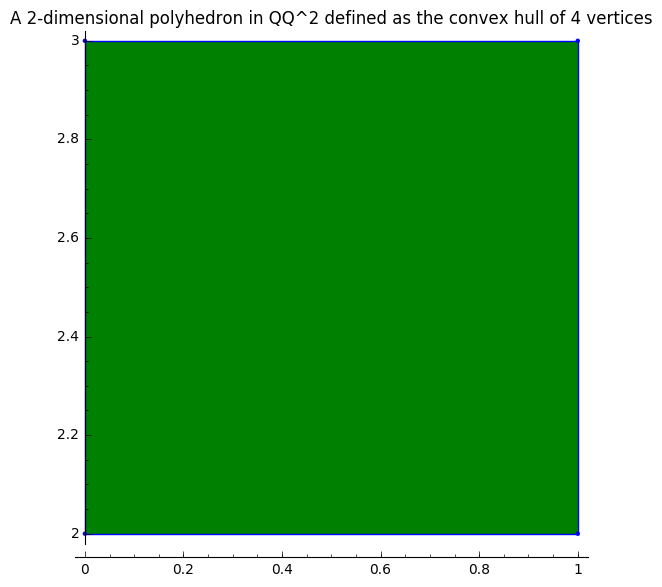

In [19]:
P = BoxInfty([[0,1], [2,3]]); P

### Random polyhedra

The `random_polygon_2d` receives the number of arguments as input and produces a polygon whose vertices are randomly sampled from the unit circle. See the docstring for more another options.

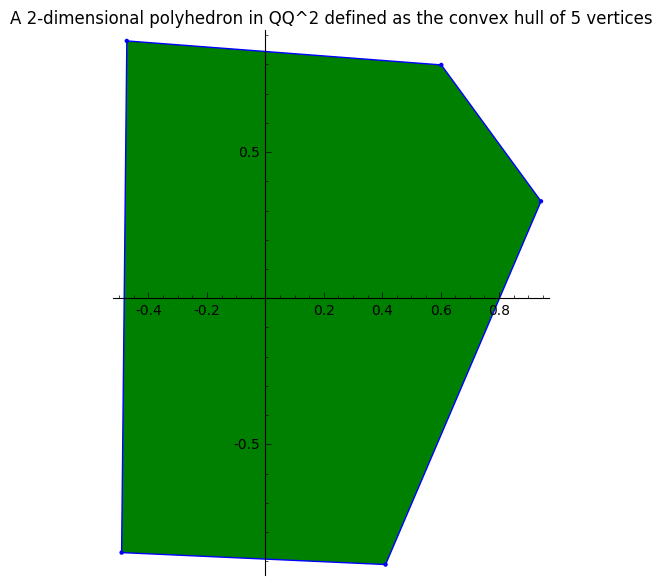

In [21]:
from polyhedron_tools.polygons import random_polygon_2d

random_polygon_2d(5)

### Opposite polyhedron

In [22]:
from polyhedron_tools.misc import BoxInfty, opposite_polyhedron

P = BoxInfty([1,1], 0.5);
mp = opposite_polyhedron(P);

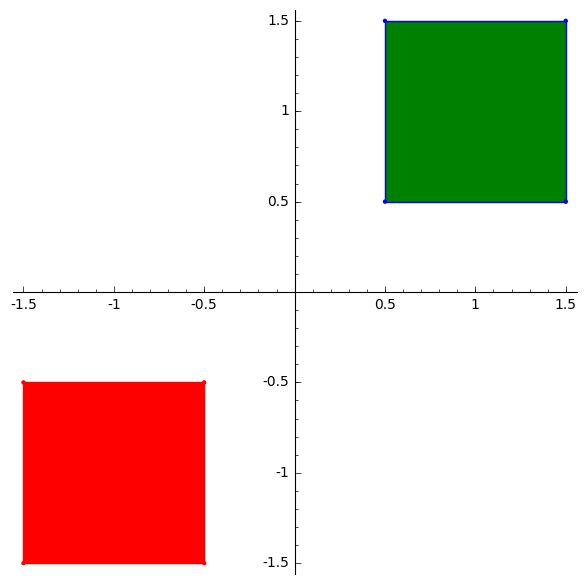

In [15]:
P.plot(aspect_ratio=1) + mp.plot(color='red')

## 3. Miscelaneous functions

### Support function of a polytope

In [24]:
from polyhedron_tools.misc import support_function

P = BoxInfty([1,2,3,4,5], 1); P
support_function(P, [1,-1,1,-1,1], verbose=1)

**** Solve LP  ****
Maximization:
  x_0 - x_1 + x_2 - x_3 + x_4 

Constraints:
  x_0 <= 2.0
  x_1 <= 3.0
  x_2 <= 4.0
  x_3 <= 5.0
  x_4 <= 6.0
  - x_0 <= 0.0
  - x_4 <= -4.0
  - x_3 <= -3.0
  - x_2 <= -2.0
  - x_1 <= -1.0
Variables:
  x_0 is a continuous variable (min=-oo, max=+oo)
  x_1 is a continuous variable (min=-oo, max=+oo)
  x_2 is a continuous variable (min=-oo, max=+oo)
  x_3 is a continuous variable (min=-oo, max=+oo)
  x_4 is a continuous variable (min=-oo, max=+oo)
Objective Value: 8.0
x_0 = 2.000000
x_1 = 1.000000
x_2 = 4.000000
x_3 = 3.000000
x_4 = 6.000000




8.0

It is also possible to input the polyhedron in matrix form, $[A, b]$. If this is possible, it is preferable, since it is often faster. Below is an example with $12$ variables. We get beteen 3x and 4x improvement in the second case. 

In [25]:
reset('P, A, b')
P = BoxInfty([1,2,3,4,5,6,7,8,9,10,11,12], 1); P
[A, b] = polyhedron_to_Hrep(P)

In [27]:
timeit('support_function(P, [1,-1,1,-1,1,-1,1,-1,1,-1,1,-1])')

125 loops, best of 3: 1.83 ms per loop


In [30]:
support_function([A, b], [1,-1,1,-1,1,-1,1,-1,1,-1,1,-1])

AttributeError: 'list' object has no attribute 'is_empty'

In [28]:
timeit('support_function([A, b], [1,-1,1,-1,1,-1,1,-1,1,-1,1,-1])')

AttributeError: 'list' object has no attribute 'is_empty'

### Support function of an ellipsoid

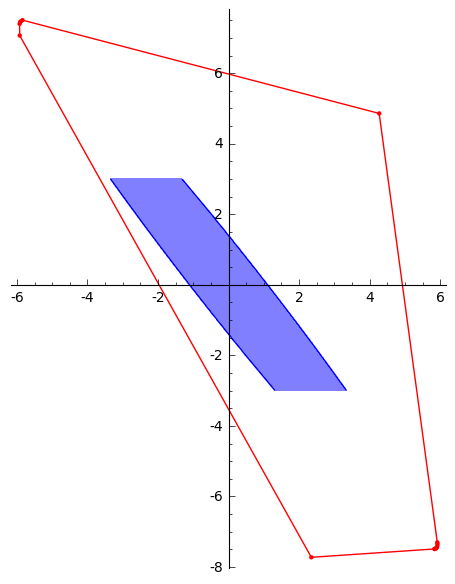

In [32]:
from polyhedron_tools.misc import support_function, support_function_ellipsoid 
import random

# Generate a random ellipsoid and check support function outer approximation.
# Define an ellipse as: x^T*Q*x <= 1
M = random_matrix(RR, 2, distribution="uniform")
Q = M.T*M
f = lambda x, y : Q[0,0]*x^2 + Q[1,1]*y^2 + (Q[0,1]+Q[1,0])*x*y-1
E = implicit_plot(f,(-5,5),(-3,3),fill=True,alpha=0.5,plot_points=600)

# generate at random k directions, and compute the overapproximation of E using support functions
# It works 'in average': we might get unbounded domains (random choice did not enclose the ellipsoid).
# It is recommended to use QQ as base_ring to avoid 'frozen set' issues.
k=15
A = matrix(RR,k,2); b = vector(RR,k)
for i in range(k):
    theta = random.uniform(0, 2*pi.n(digits=5))
    d = vector(RR,[cos(theta), sin(theta)])
    s_fun = support_function_ellipsoid(Q, d)
    A.set_row(i,d); b[i] = s_fun

OmegaApprox = polyhedron_from_Hrep(A, b, base_ring = QQ)
E + OmegaApprox.plot(fill=False, color='red')

### Supremum norm of a polyhedron

In [35]:
from polyhedron_tools.misc import BoxInfty, radius

In [36]:
P = BoxInfty([-13,24,-51,18.54,309],27.04);
radius(P)

ImportError: No module named polyhedron_toolbox.misc

In [19]:
got_lengths, got_center_and_radius = False, False

In [20]:
got_lengths is not False

False

In [37]:
radius(polyhedron_to_Hrep(P))

ImportError: No module named polyhedron_toolbox.misc

In [38]:
8401/25.n()

336.040000000000

Consider a higher-dimensional system. We obtain almost a 200x improvement for a 15-dimensional set. This is because in the case we call ```poly_sup_norm``` with a polytope, the ```bounding_box()``` function consumes time. 

For a 20-dimensional set, the polyhedron construct does not finish. 

In [39]:
%%time 
P = BallInfty([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 14.28);
radius(P)

NameError: name 'BallInfty' is not defined

In [40]:
%%time 
[A, b] = BallInfty([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 14.28, base_ring = RDF, return_HSpaceRep = True)
radius([A, b])

NameError: name 'BallInfty' is not defined

In [25]:
3.87/19.6e-3

197.448979591837

###  Linear map of a polyhedron

The operation `matrix x polyhedron` can be performed in Sage with the usual command, `*`.

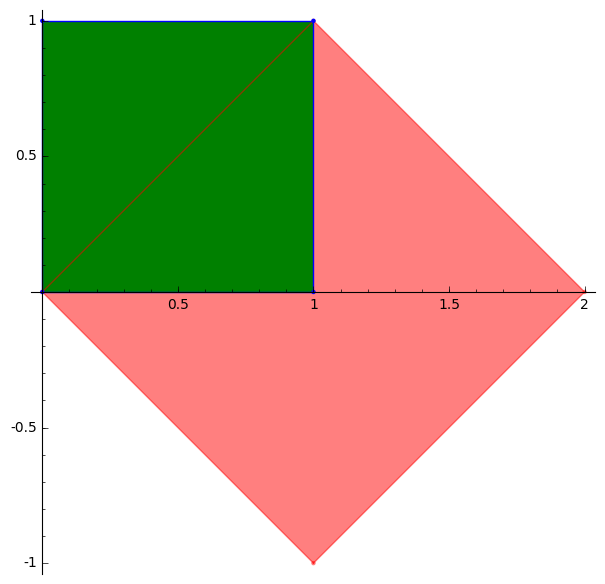

In [41]:
U = BoxInfty([[0,1],[0,1]])
B = matrix([[1,1],[1,-1]])
P = B * U
P.plot(color='red', alpha=0.5) + U.plot()

###  Chebyshev center

In [43]:
from polyhedron_tools.misc import chebyshev_center, BoxInfty
from polyhedron_tools.polygons import random_polygon_2d

P = random_polygon_2d(10, base_ring = QQ)
c = chebyshev_center(P); 

B = BoxInfty([[1,2],[0,1]])
b = chebyshev_center(B)

fig = point(c, color='blue') + P.plot(color='blue', alpha=0.2)
fig += point(b, color='red') + B.plot(color='red', alpha=0.2)

fig += point(P.center().N(), color='green',marker='x')
fig += point(B.center().N(), color='green',marker='x')

fig

NameError: global name 'sqrt' is not defined

The method ```center()``` existent in the Polyhedra class, computes the average of the vertices. In contrast, the Chebyshev center is the center of the largest box enclosed by the polytope.

In [44]:
B.bounding_box()

AttributeError: 'sage.matrix.matrix_integer_dense.Matrix_integer_dense' object has no attribute 'bounding_box'

In [45]:
P.bounding_box()

((-1211/1238, -1194/1195), (926/977, 1099/1132))

In [46]:
e = [ (P.bounding_box()[0][0] + P.bounding_box()[1][0])/2, (P.bounding_box()[0][1] + P.bounding_box()[1][1])/2]
l = [[P.bounding_box()[0][0], P.bounding_box()[1][0]], [P.bounding_box()[0][1], P.bounding_box()[1][1]] ]

fig += point(e,color='black') + BoxInfty(lengths=l).plot(alpha=0.1,color='grey')

fig

NameError: name 'fig' is not defined

Here we have added in grey the bounding box that is obtained from the method ```bounding_box()```. To make the picture complete, we should also add the box of center Cheby center, and of maximal radius which is included in it.

## 4. Approximate projections

In [47]:
from polyhedron_tools.projection import lotov_algo
from polyhedron_tools.misc import polyhedron_to_Hrep, polyhedron_from_Hrep 

A = matrix([[-1.0, 0.0,  0.0,  0.0,  0.0,  0.0],
[ 1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0]])

b = vector([0.0, 10.0, 0.0, 0.0, 0.2, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0])

P = polyhedron_from_Hrep(A, b); P

ImportError: No module named projection

In [48]:
lotov_algo(A, b, [1,0,0], [0,1,0], 0.5)

NameError: name 'lotov_algo' is not defined